In [72]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np, glob
from scipy.special import expit
import theano.tensor as tt
N = 100
num_feature = 5

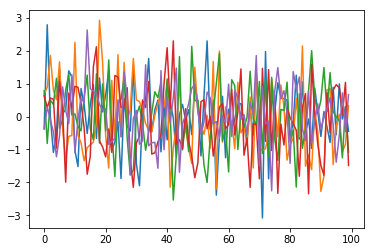

In [73]:
#Simulation
W_true = np.random.randn(num_feature)
sigma_true = np.random.randn()+1
data = []
data_label = []
for i in range(N):
    #Generate Point
    point = np.random.randn(num_feature)
    
    #latent variable for data to label
    epsilon = sigma_true*np.random.randn()
    p = expit(np.dot(W_true,point)+epsilon)
    
    #generate label
    label = np.random.binomial(1,p)
    
    #add point and label
    data.append(point)
    data_label.append(label)
data = np.array(data)
data_label = np.array(data_label)
plt.plot(data);

In [75]:
mult_mu = np.zeros(num_feature,)
#cov = np.random.random_sample((num_feature,num_feature))
cov = np.eye(num_feature)

with pm.Model() as basic_model:
    sig = pm.Normal('sig',mu=1,sd=1)
    W = pm.MvNormal('W',mu=mult_mu,cov=cov,shape=num_feature)
    ep = pm.Normal('ep',mu=0,sd=sig)
    p = pm.math.sigmoid(tt.dot(data,W)+ep)
    #lab = pm.Bernoulli('lab',p=p,observed=data_label)
    lab = pm.Bernoulli('lab',p=p,observed=data_label)
    for RV in basic_model.basic_RVs:
        print(RV.name, RV.logp(basic_model.test_point))
    trace=pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


sig -0.9189385332046727
W -4.594692666023363
ep -0.9189385332046727
lab -69.31471805599459


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ep, W, sig]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:04<00:00, 431.69draws/s]
There were 256 divergences after tuning. Increase `target_accept` or reparameterize.
There were 270 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2331cef0>,
      dtype=object)

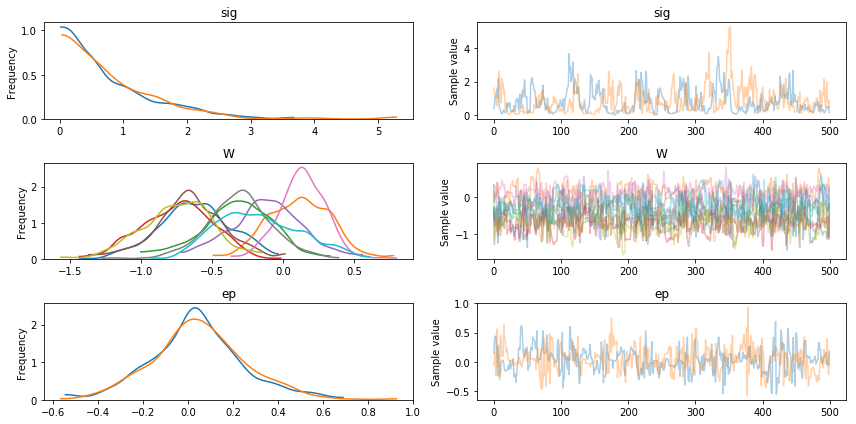

In [76]:
pm.traceplot(trace)

In [77]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
sig,0.816528,0.729905,0.053689,0.018961,2.213278,108.250195,1.000012
W__0,-0.642693,0.248283,0.012751,-1.151231,-0.163986,264.517760,1.003914
W__1,0.123394,0.197899,0.010327,-0.304647,0.466088,260.569896,1.002767
W__2,-0.322606,0.243725,0.013920,-0.815584,0.174881,198.843149,0.999678
W__3,-0.748131,0.249317,0.013413,-1.201336,-0.247483,242.690662,0.999054
W__4,-0.145537,0.272795,0.016829,-0.637467,0.395028,152.436020,1.011420
ep,0.042682,0.204858,0.010176,-0.357107,0.455416,314.064937,0.999804


In [78]:
W_true

array([-0.97764532,  0.02846712, -0.08443802, -0.6047926 , -0.04564986])

In [79]:
sigma_true

-0.053523545729193156